# Private Comparison Groups #

"Comparison Groups" is a powerful technique for isolating the effect of external influence on energy consumption. This technique has received growing attention because of the massive effect of COVID-19 quarantine measures on energy usage.

This notebook applies the methods described in [Differentially Private Comparison Groups: Motivation and Methods](recurve.com), computing a number of useful Comparison Group statistics while preserving the privacy of individuals chosen for analysis.


In [1]:
# Preamble: imports and figure settings

from eeprivacy import (
  PrivateVectorClampedMean,
)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
from scipy import stats

np.random.seed(1234) # Fix seed for deterministic documentation

mpl.style.use("seaborn-white")

MD = 28
LG = 36
plt.rcParams.update({
    "figure.figsize": [25, 18],
    "legend.fontsize": MD,
    "axes.labelsize": LG,
    "axes.titlesize": LG,
    "xtick.labelsize": LG,
    "ytick.labelsize": LG,
})

## Dataset ##

For this example, we generate a population of synthetic daily load shapes:

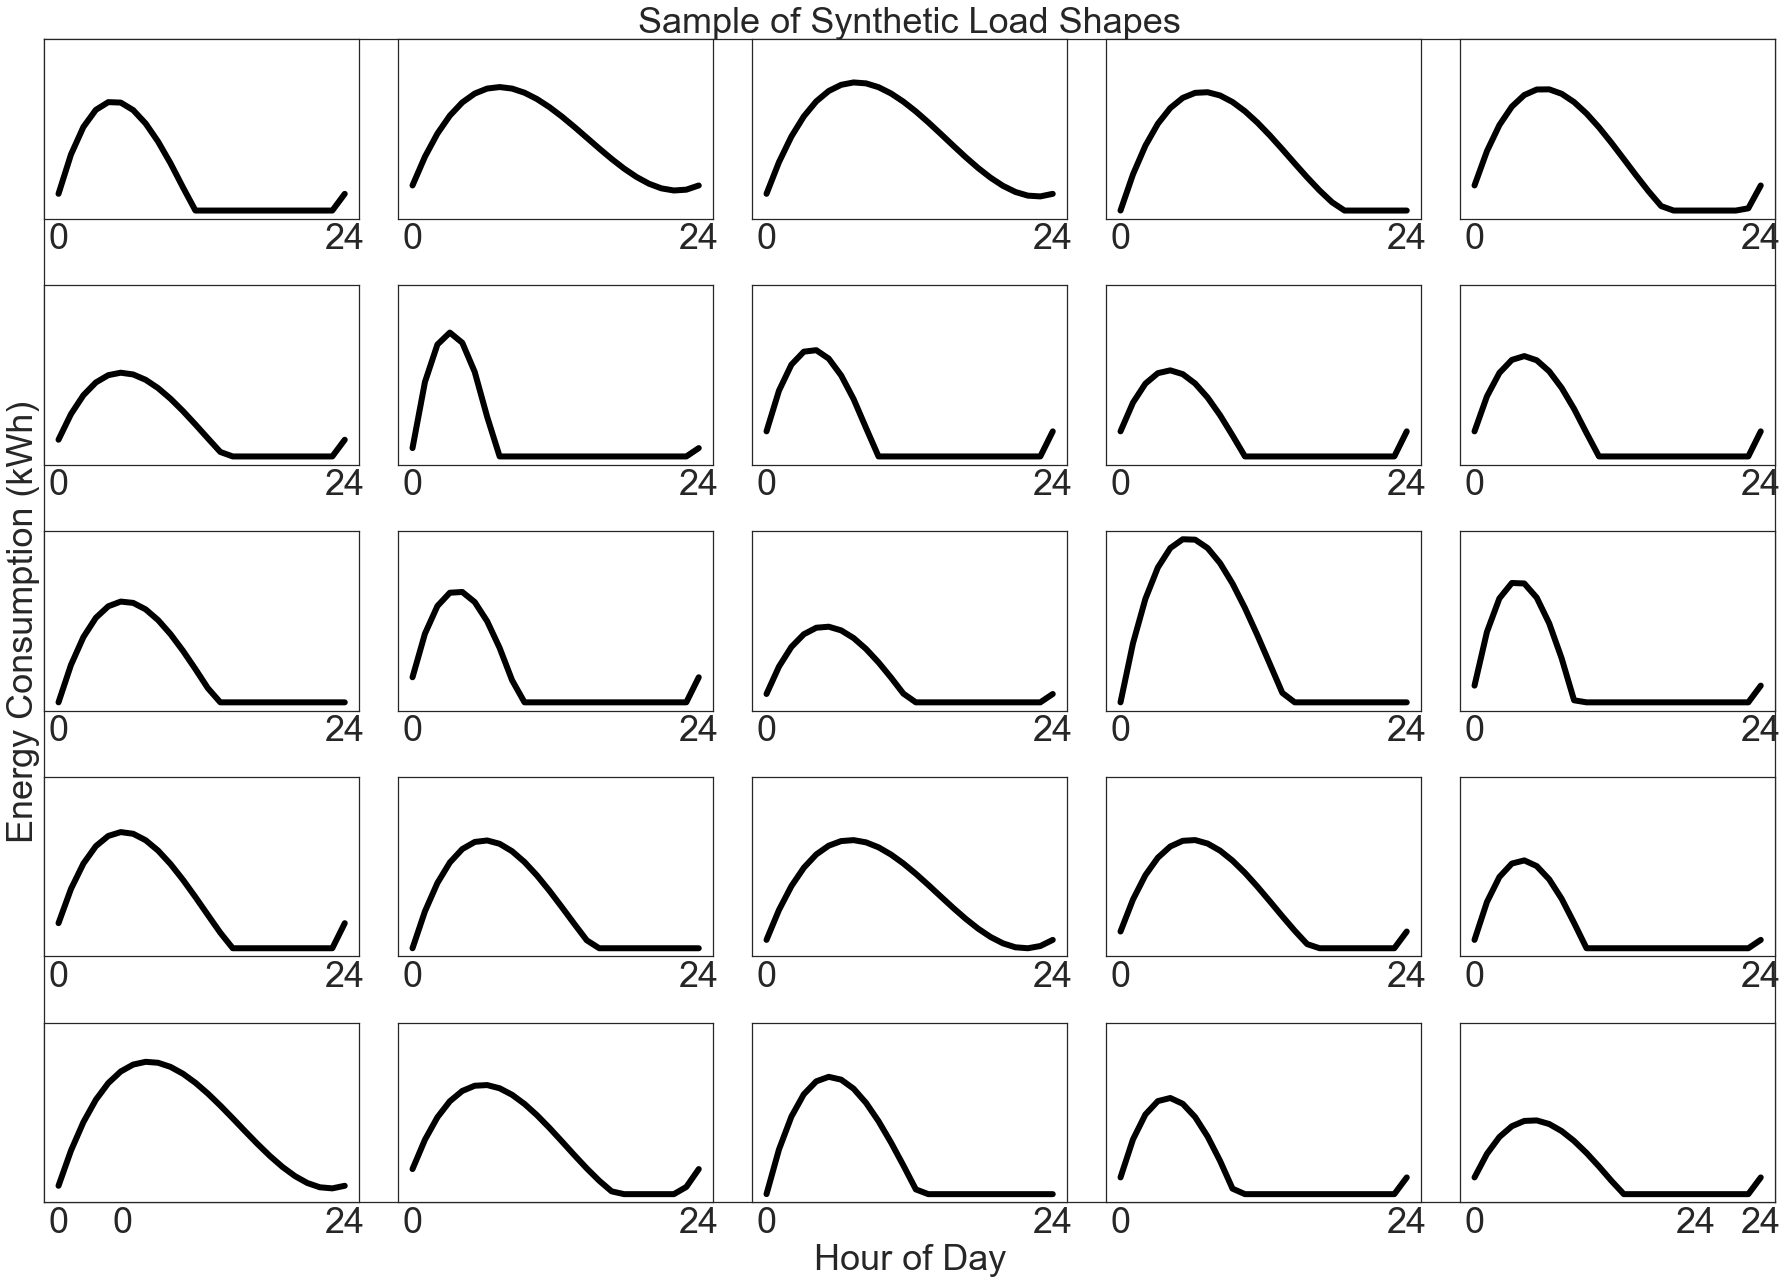

In [2]:
def synthetic_load_shape():
    x = np.array([
      0, 
      np.random.randint(2, 6), 
      np.random.randint(7, 18), 
      24
    ])
    y0 = np.random.randint(low=0, high=4)
    y = np.array([
      y0, 
      np.random.randint(low=8, high=14), 
      np.random.randint(low=0, high=9), 
      y0
    ])
    z = np.polyfit(x, y, 3)
    p = np.poly1d(z)
    xs = np.linspace(0, 24, num=24)
    ys = p(xs)
    ys[ys < 0] = 0
    return ys
 
xs = np.linspace(0, 24, num=24)

R = 5
C = 5

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for i in range(R):
    for k in range(C):
        axx = fig.add_subplot(R, C, i*C+k+1, sharex=ax, sharey=ax)
        axx.set_xticks([0, 24])
        axx.set_yticks([])
        axx.plot(xs, synthetic_load_shape(), linewidth=6, color="k")

fig.tight_layout(pad=3.0)
        
ax.set_title("Sample of Synthetic Load Shapes")
ax.set_xlabel("Hour of Day")
ax.set_ylabel("Energy Consumption (kWh)")
plt.show()

## Population Mean with Laplace Mechanism ##

## Population P99 with Laplace Mechanism ##

## Comparison Group Percent Change in Consumption with Laplace Mechanism ##

## Comparison Group Average Load Shape with Gaussian Mechanism ##

